In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing data

In [10]:
# Step 0: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,-8.4230,-6.6402,2.98050,-0.93922,0.090349,0.219830,0,subject1
1,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,2.2046,-7.5497,4.02880,-0.21961,-1.080100,0.303880,0,subject8
2,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,-2.5898,-8.5217,3.83430,-0.88431,-0.848050,0.331900,0,subject2
3,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,-1.0049,-6.8588,2.11540,-0.35686,-0.854210,-0.415950,0,subject4
4,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-1.4178,-9.5157,1.43050,-0.12353,-0.967150,-0.497840,0,subject3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373190,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.43725,-1.018500,0.079741,12,subject10
373191,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.43725,-1.018500,0.079741,12,subject10
373192,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.43725,-1.018500,0.079741,12,subject10
373193,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.42549,-1.037000,0.084052,12,subject10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373195 entries, 0 to 373194
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 39.9+ MB


In [5]:
df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


In [6]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)

In [7]:
df.Activity.value_counts()

,count
Activity,
1,30720
3,30720
2,30720
4,30720
9,30720
11,30720
5,30720
10,30720
0,29540


In [8]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'
}

In [11]:
# Preprocess Features
print("Selecting and scaling features...")
feature_cols = df.columns[:-2]  # Exclude 'activity_label' and 'subject'
label_col = 'Activity'

scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

Selecting and scaling features...


In [12]:
def plot_comparison(data, metric = 'acceleration'):

  metric = metric[0].lower()
  data = data

  for i in range(0,13):
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend()

    plt.show()
    print()

def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

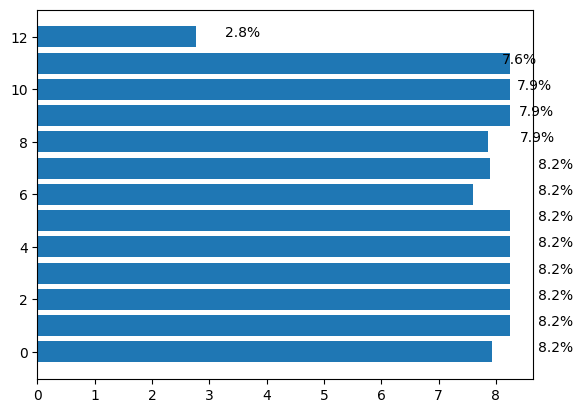

In [13]:
plot_category(df,'Activity')

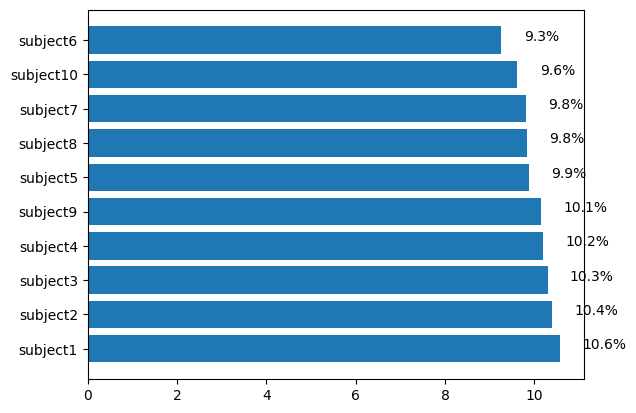

In [14]:
plot_category(df,'subject')

#EDA of 1 subject data

In [15]:
subject1 = df[df['subject']=='subject1']
subject1.Activity.value_counts()

,count
Activity,
0,4243
8,3379
1,3072
3,3072
2,3072
4,3072
6,3072
7,3072
9,3072


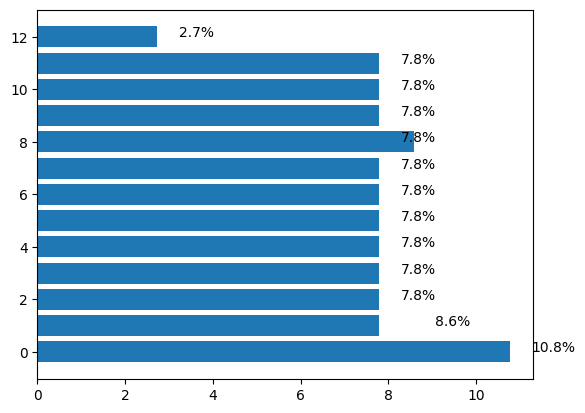

In [16]:
plot_category(subject1,'Activity')

In [17]:
plot_comparison(subject1,'acceleration')

Output hidden; open in https://colab.research.google.com to view.

In [18]:
plot_comparison(subject1,'gyroscope')

Output hidden; open in https://colab.research.google.com to view.

# EDA of Full Dataset

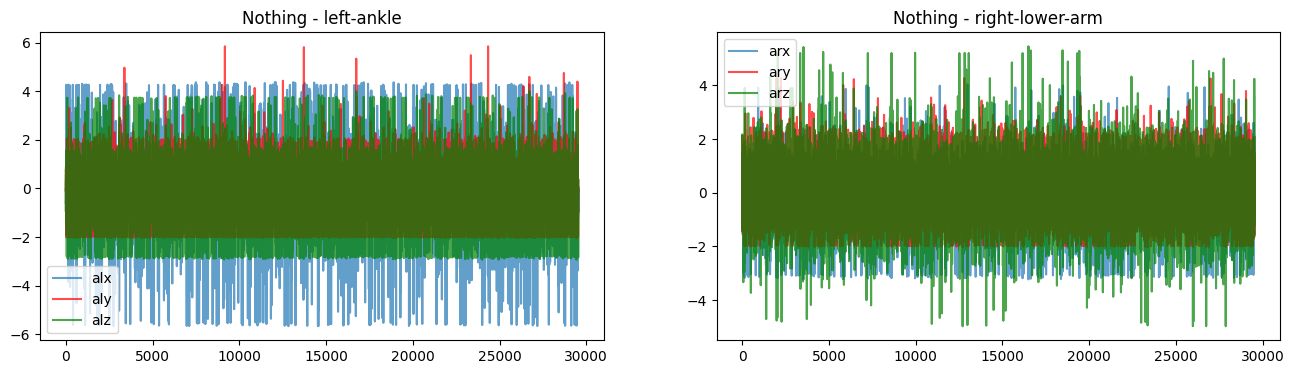

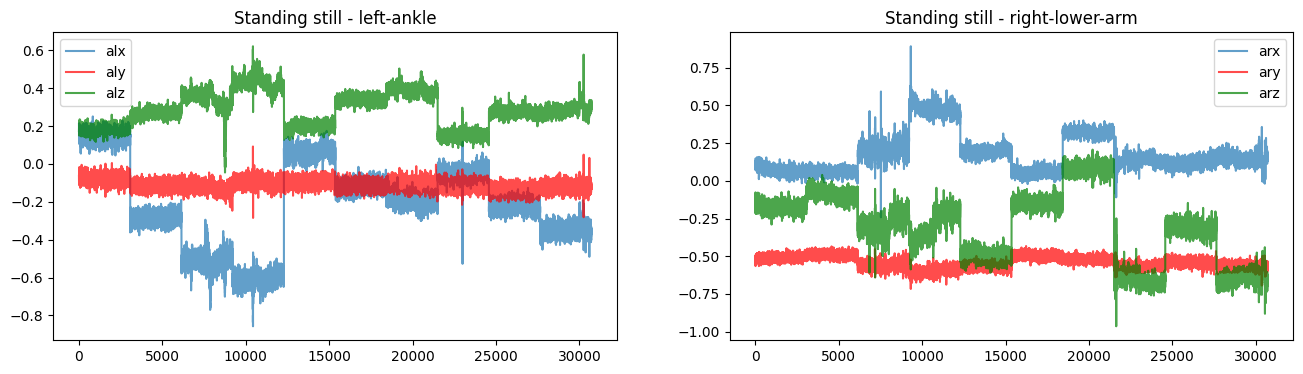

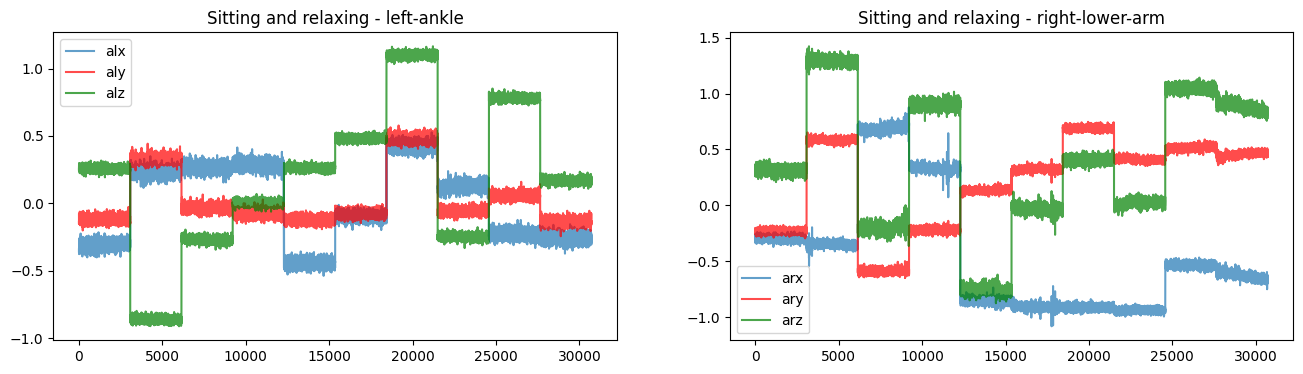

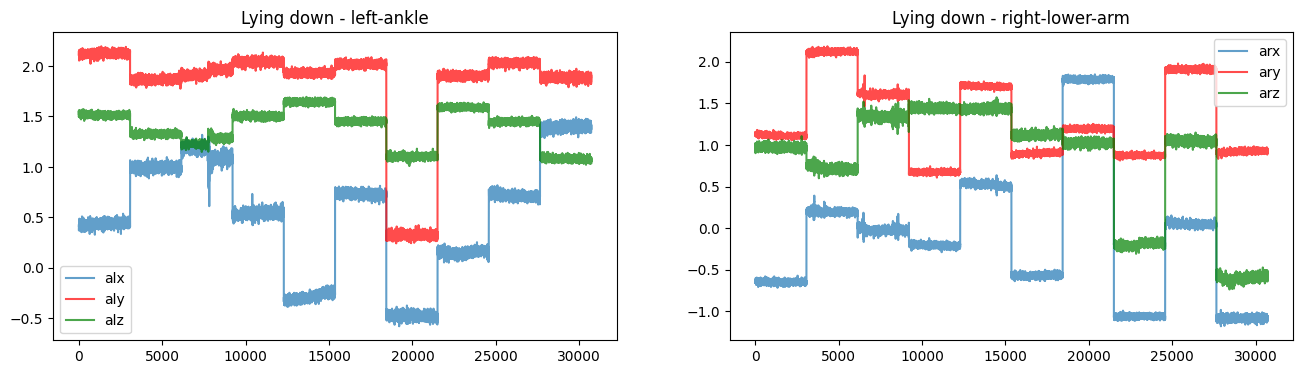

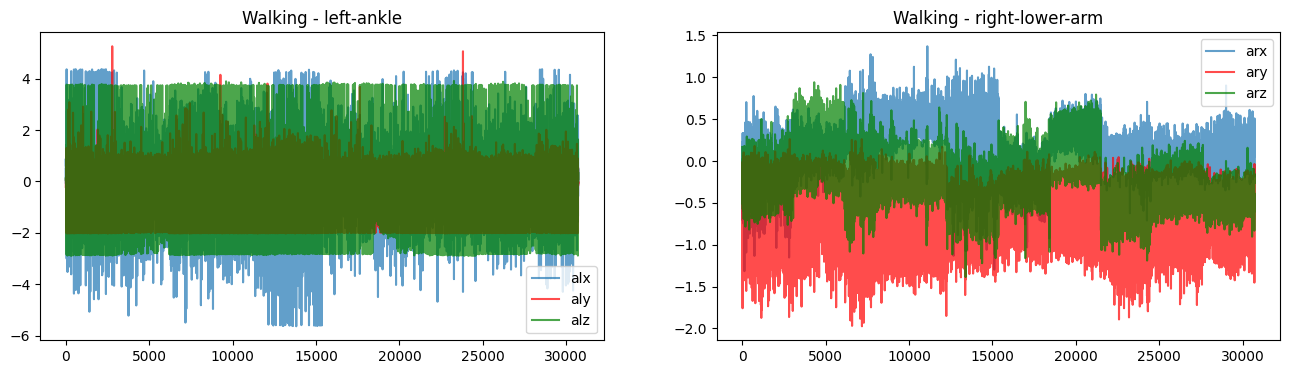

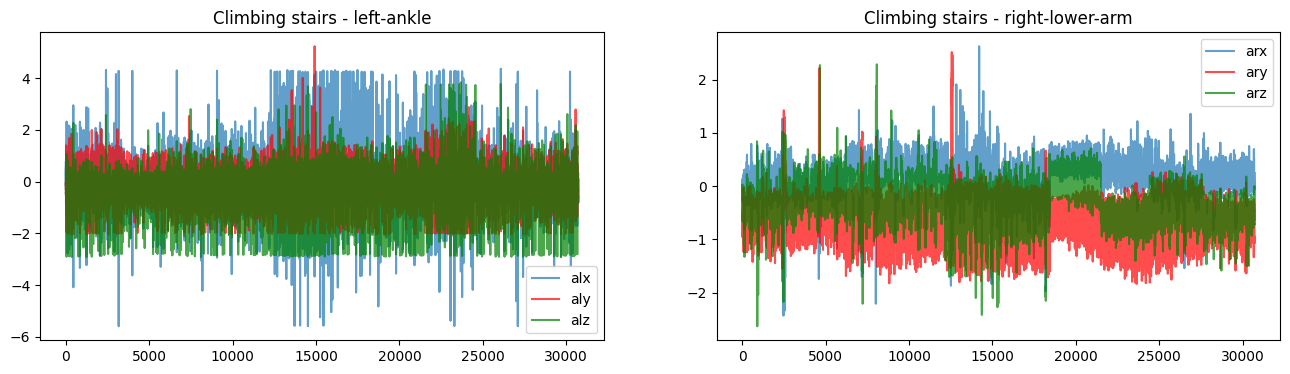

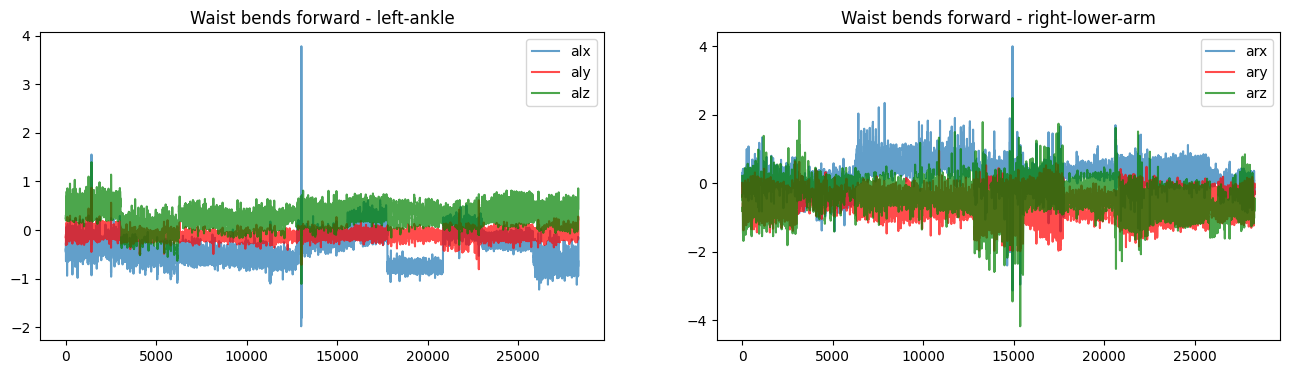

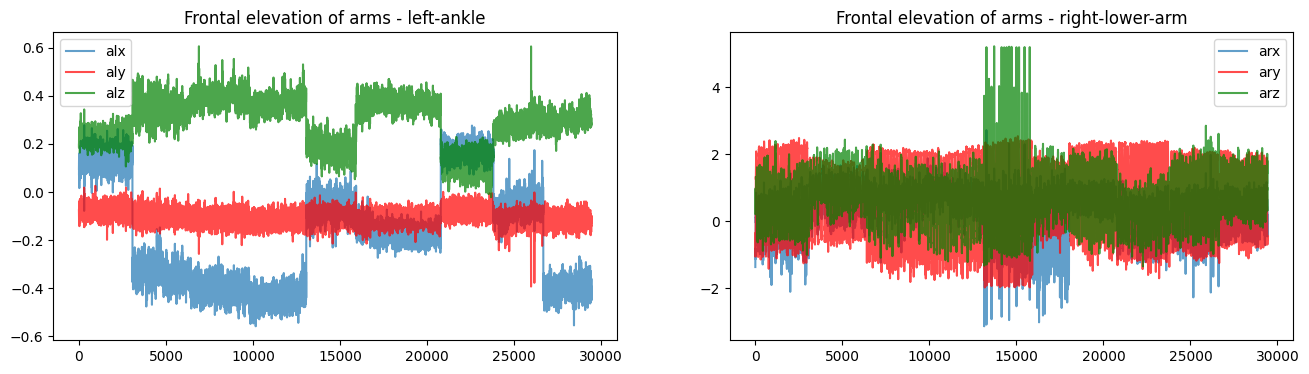

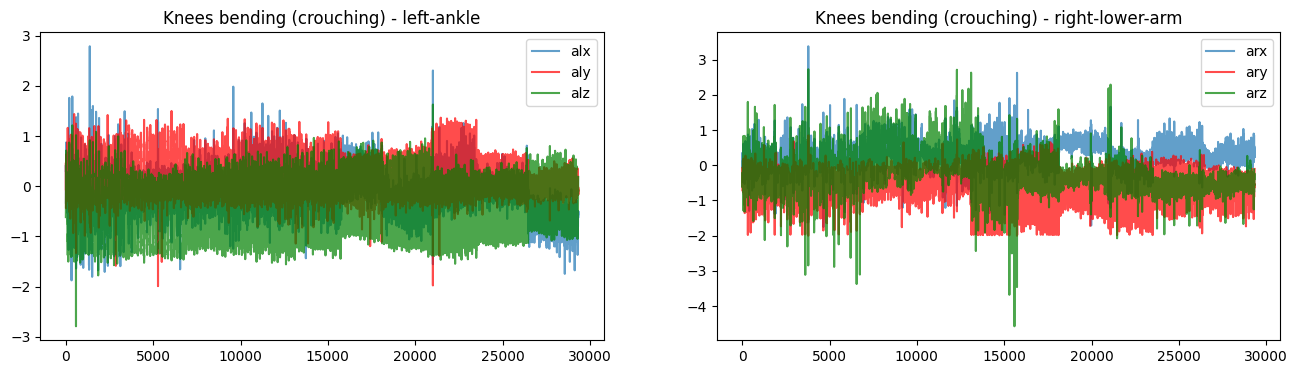

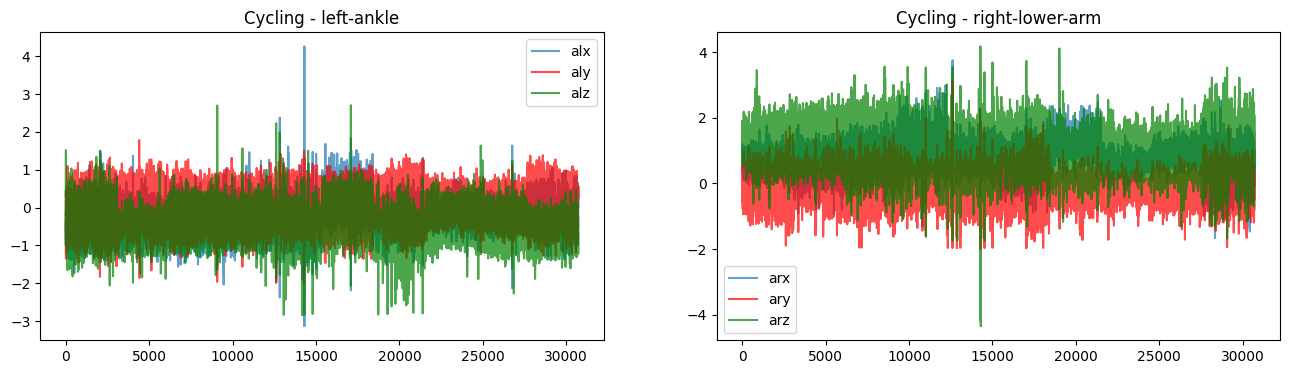

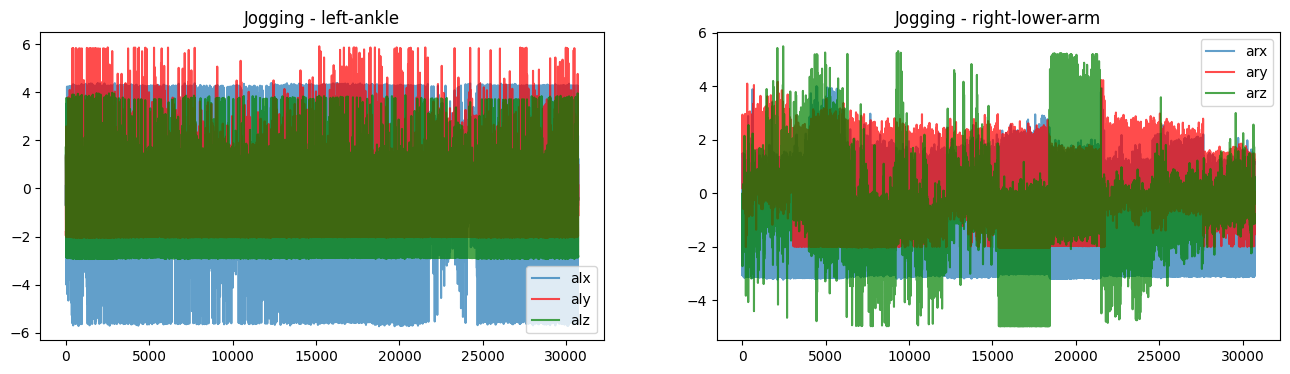

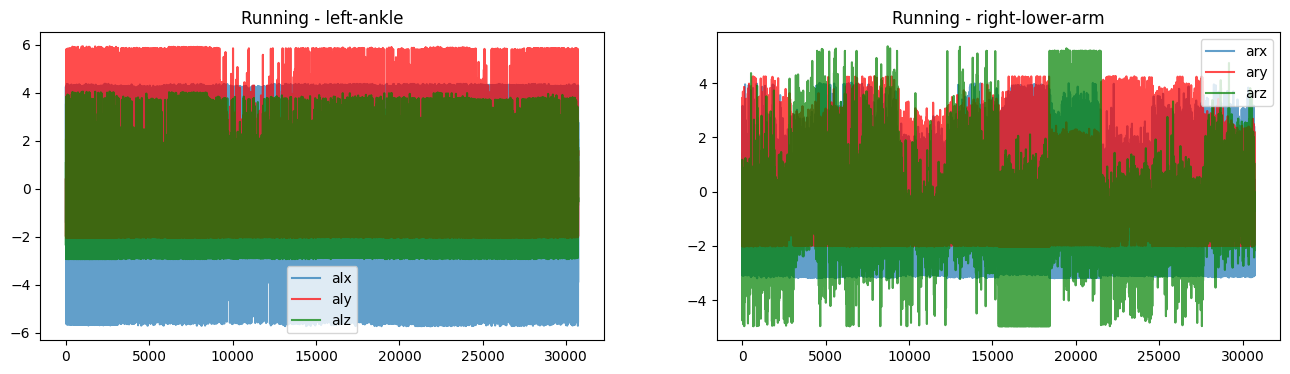

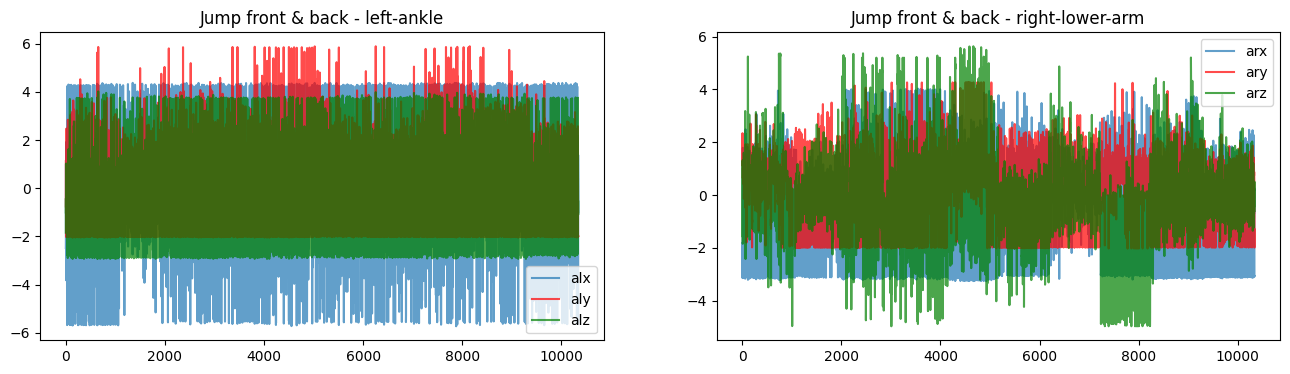

In [19]:
plot_comparison(df)

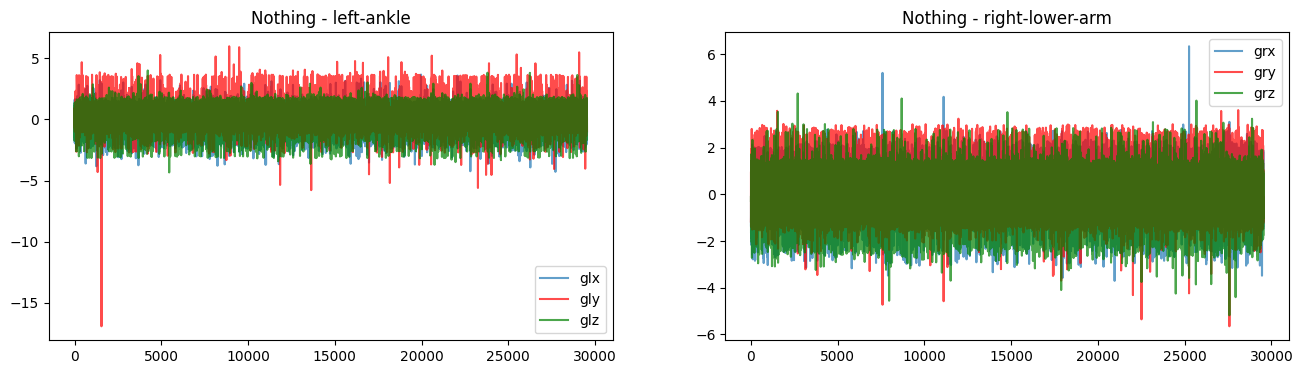

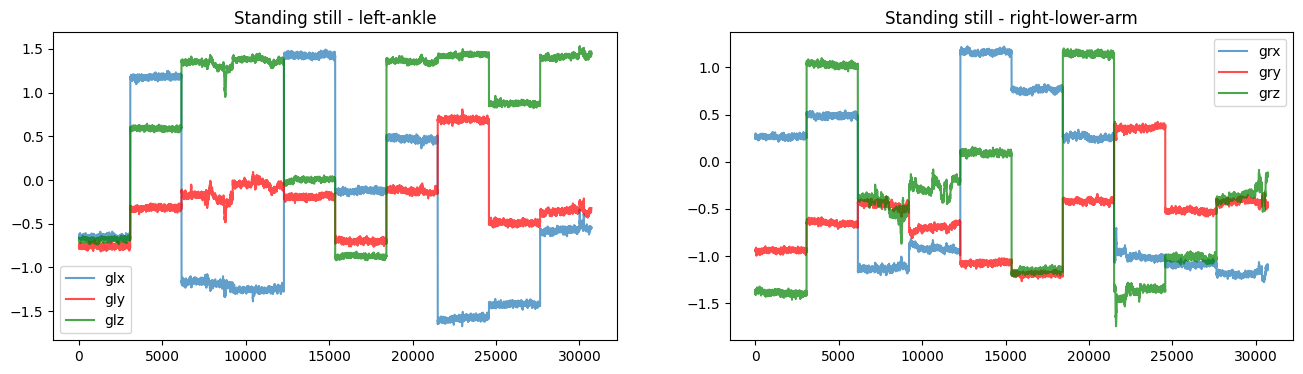

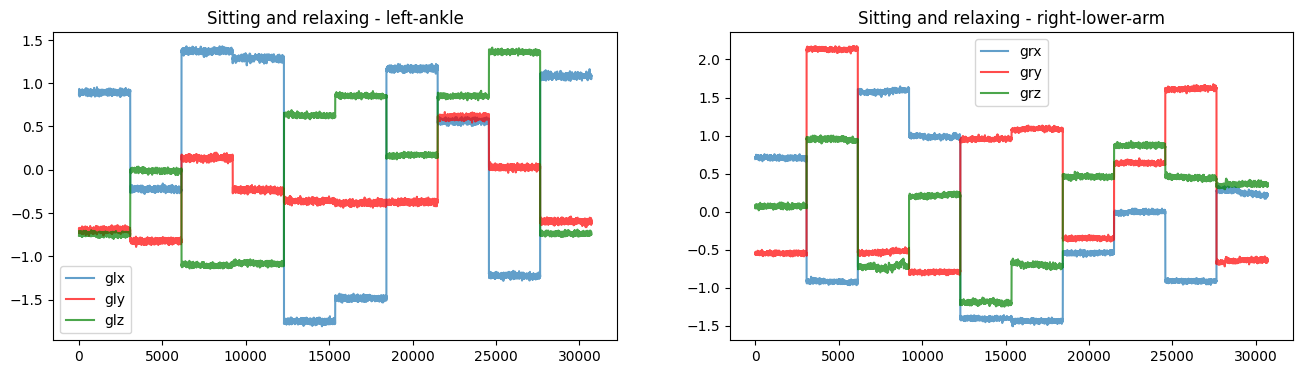

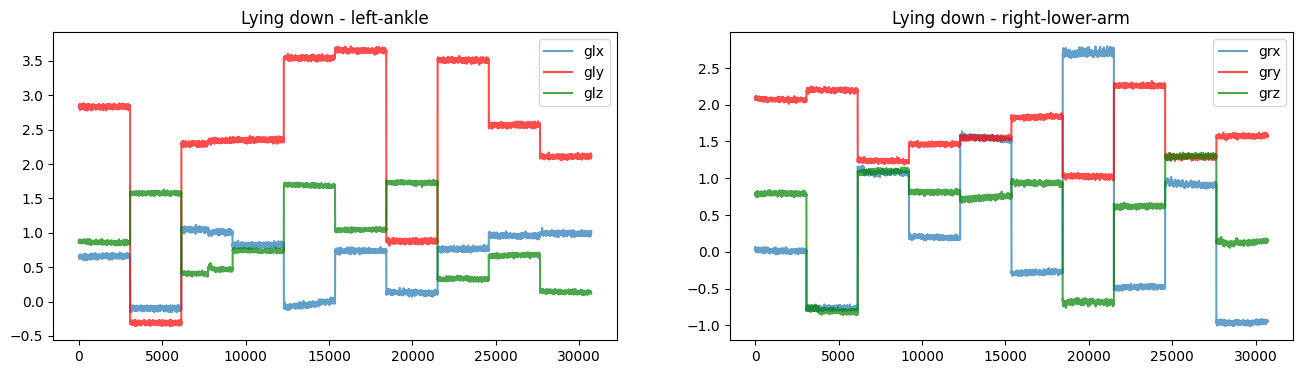

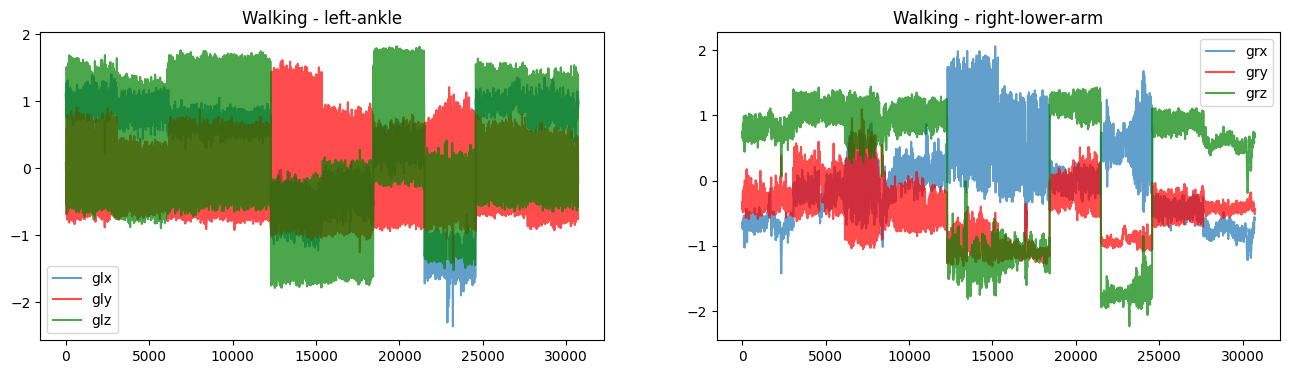

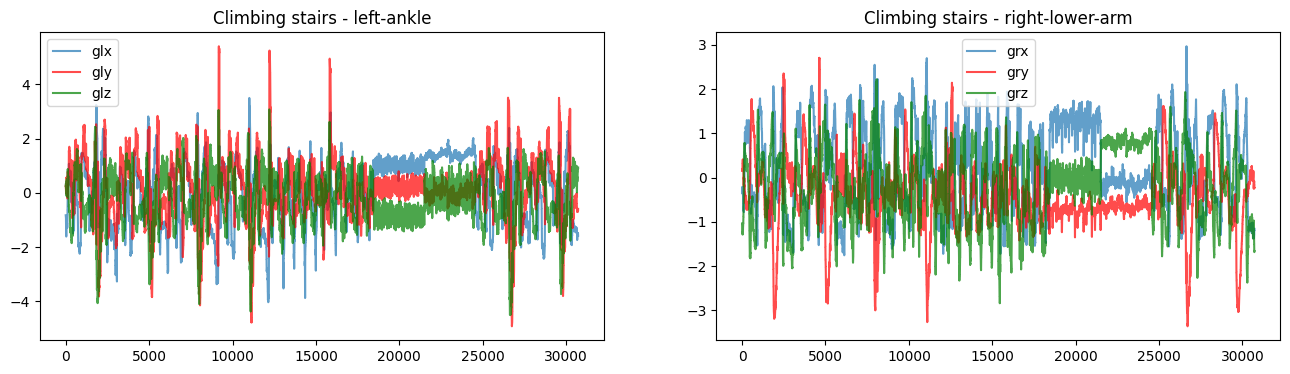

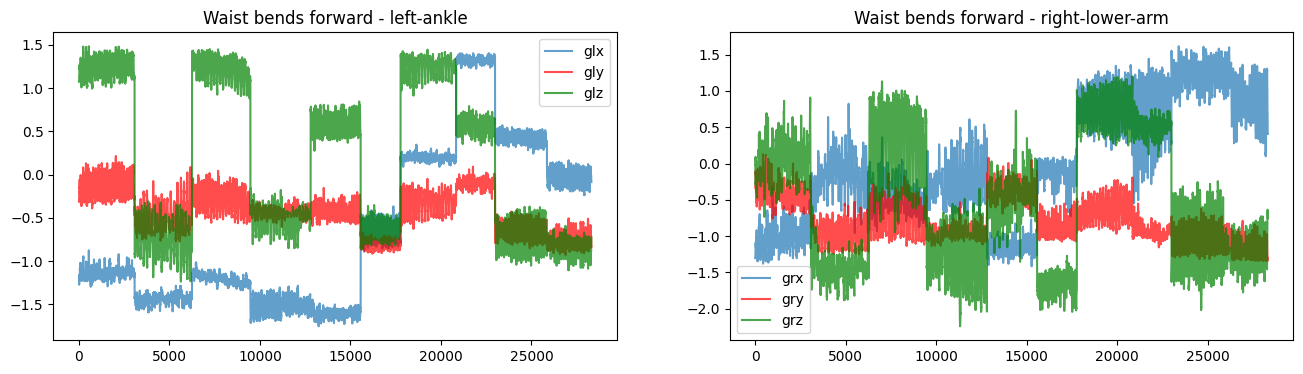

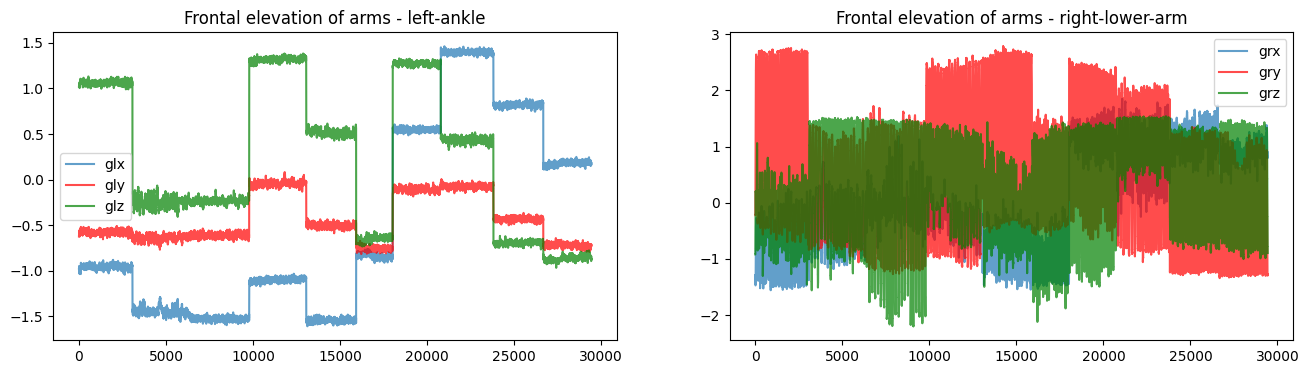

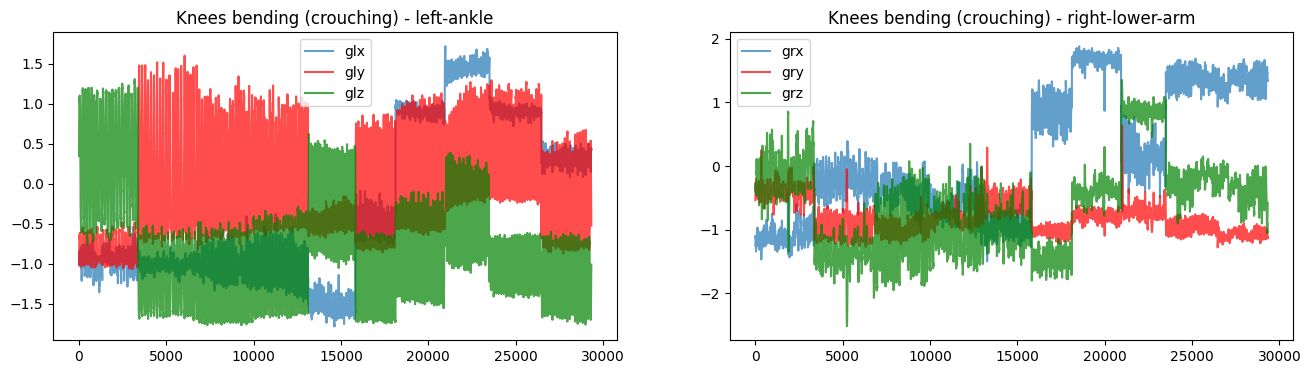

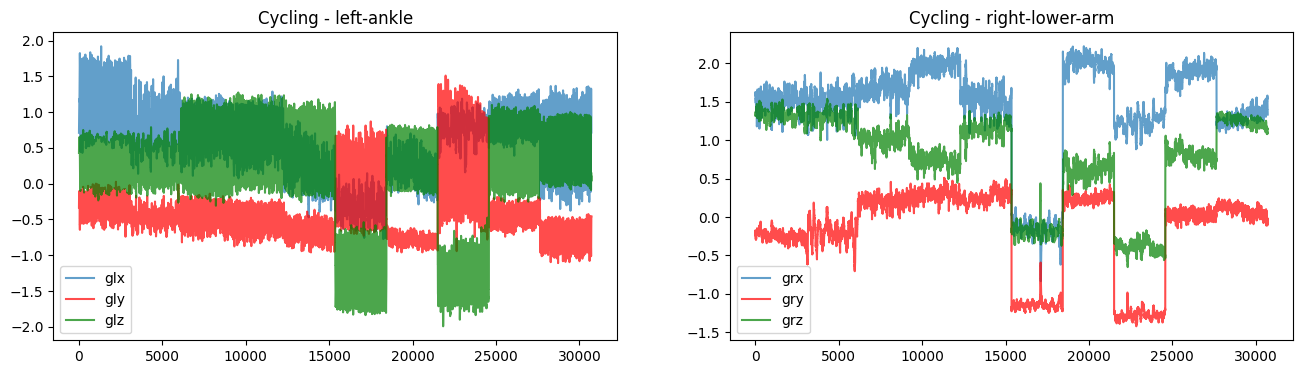

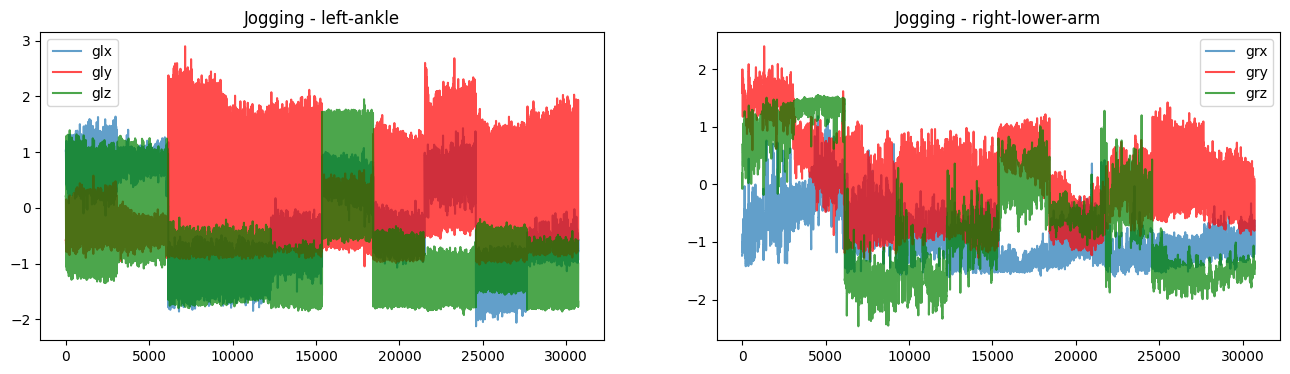

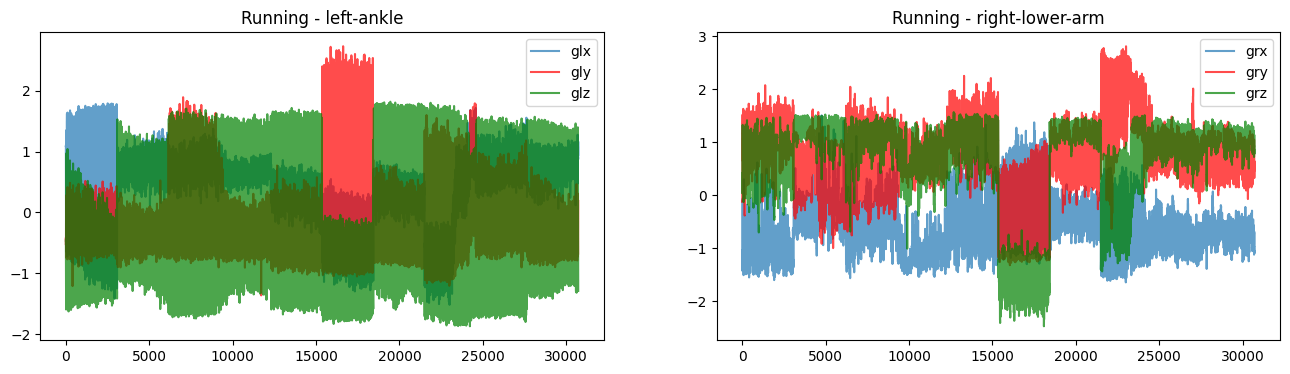

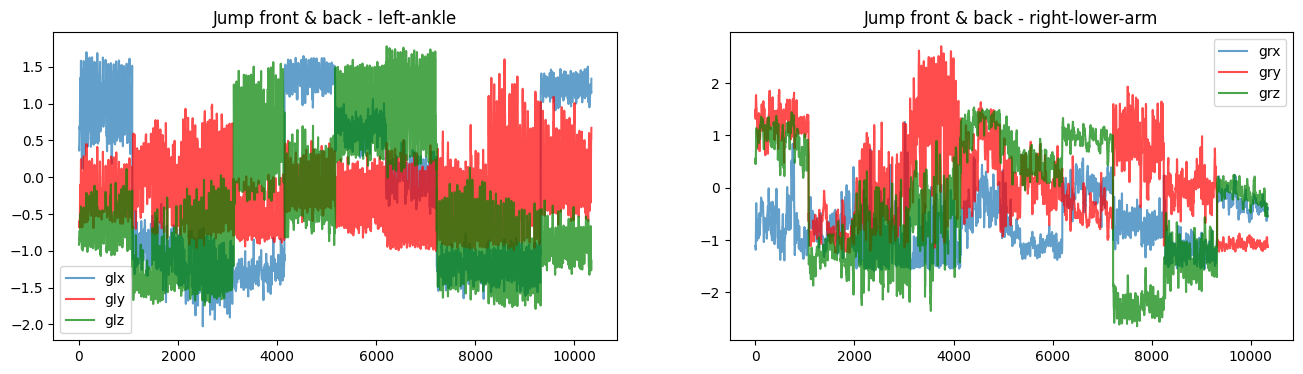

In [20]:
plot_comparison(df,'gyroscope')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

<Figure size 800x600 with 0 Axes>

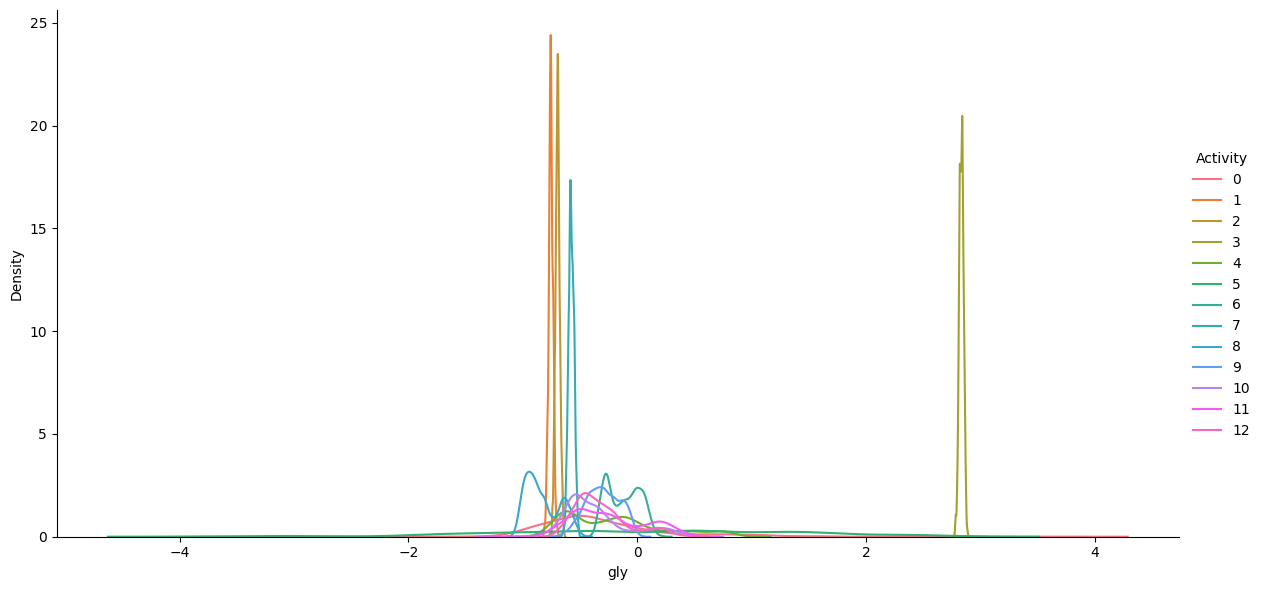

In [21]:
plt.figure(figsize=(8,6))
facetgrid = sns.FacetGrid(subject1, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'gly', hist=False).add_legend()
#sns.distplot('gly', hist=False, hue='Activity', data=df)
plt.show()

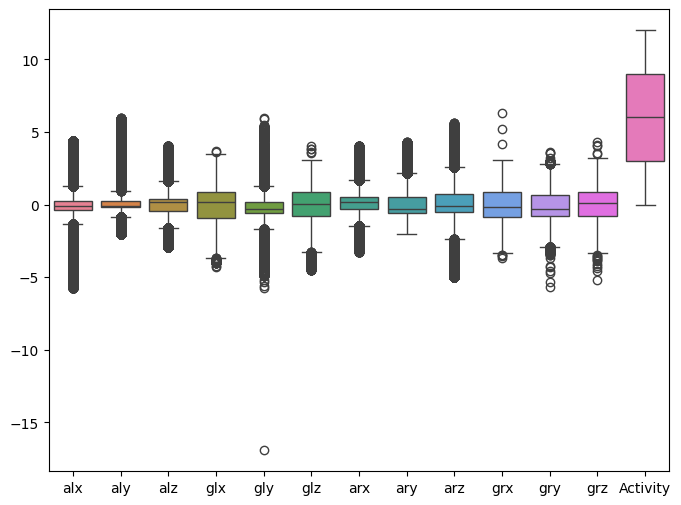

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

# Data Cleaning

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,372735.0,7.747181e-17,1.000001,-5.733063,-0.386330,-0.097073,0.266738,4.380389
aly,372735.0,-1.964246e-16,1.000001,-2.056746,-0.186154,-0.093693,0.274935,5.938510
alz,372735.0,6.100143e-18,1.000001,-2.934592,-0.415787,0.161352,0.391227,4.051129
glx,372735.0,-1.220029e-17,1.000001,-4.282762,-0.959506,0.201661,0.850324,3.677262
gly,372735.0,-1.372532e-16,1.000001,-16.922010,-0.592766,-0.311823,0.149086,5.991699
glz,372735.0,4.819113e-17,1.000001,-4.507015,-0.804317,0.027560,0.855905,4.013556
arx,372735.0,-7.076166e-17,1.000001,-3.264853,-0.292064,0.163515,0.497678,4.028633
ary,372735.0,-3.021858e-16,1.000001,-2.031157,-0.578896,-0.296942,0.525309,4.273722
arz,372735.0,1.348132e-16,1.000001,-4.972504,-0.541343,-0.133268,0.700060,5.631862
grx,372735.0,1.073625e-16,1.000001,-3.706080,-0.870638,-0.179676,0.844233,6.332530


In [24]:
df1 = df.copy()

In [25]:
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -3.1752535877660013 to 4.186140889658715
shape (365279, 14)
aly range: -2.009692238559602 to 2.2701470974323854
shape (359570, 14)
alz range: -2.868020905099651 to 2.3472350290894064
shape (355824, 14)
glx range: -1.7963629090949031 to 1.5470283907125049
shape (348955, 14)
gly range: -1.1940296833482074 to 3.564161545151531
shape (342393, 14)
glz range: -1.7671852824213463 to 1.7196378712984948
shape (336952, 14)
arx range: -3.1172385350623695 to 2.176700958238814
shape (331872, 14)
ary range: -1.988341327316426 to 2.731270037123499
shape (325812, 14)
arz range: -3.0769123200270623 to 2.2759007889855187
shape (323248, 14)
grx range: -1.4792538248522922 to 2.1294969036397906
shape (319774, 14)
gry range: -1.3237699606566566 to 2.420855287428656
shape (314957, 14)
grz range: -2.0426284926442904 to 1.4486792743310632
shape (310552, 14)


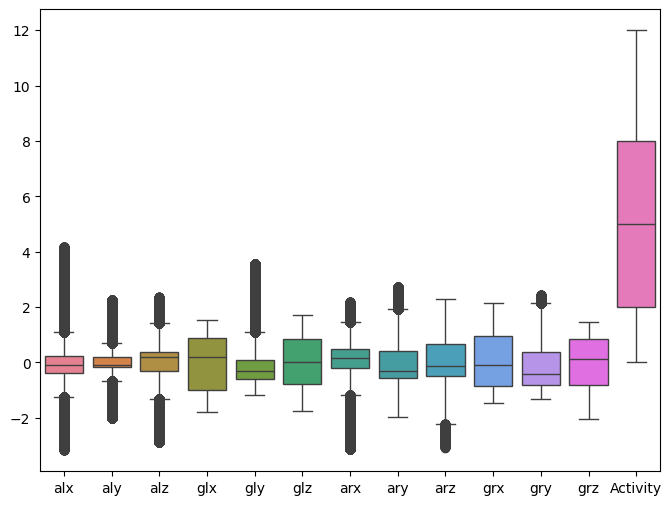

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()

#Exporting Data

In [27]:
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((246210, 14), (64342, 14))

In [29]:
train.to_csv('/content/drive/MyDrive/mhealth_raw_data.csv',index=False)
test.to_csv('/content/drive/MyDrive/test.csv',index=False)

In [30]:
train = pd.read_csv('/content/drive/MyDrive/mhealth_raw_data.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
train.shape,test.shape

((246210, 14), (64342, 14))